In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("bird.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Reshape the image to a 2d array of pixels and 3 colors values (RGB)


In [3]:
pixel_values = image.reshape((-1, 3))
print(pixel_values)

pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

[[102 119  67]
 [105 122  70]
 [108 125  73]
 ...
 [163 177  82]
 [160 174  77]
 [159 173  75]]
(6176276, 3)


# Define stopping criteria


In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Number of cluster(k)



In [5]:
k=6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values

In [6]:
centers = np.uint8(centers)

# Flatten the labels array

In [7]:
labels = labels.flatten()



# Convert all pixels to the color of the centroids

In [8]:
segmented_image = centers[labels.flatten()]

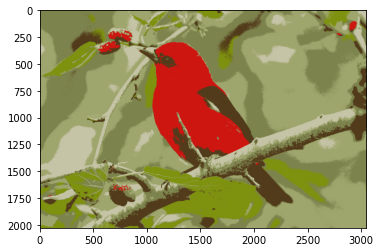

In [13]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
#show the image
plt.imshow(segmented_image)
plt.show()